In [33]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [34]:
data = pd.read_csv("bladder_cancer.csv")
data = data.dropna()
data.isnull().sum()

Amp_1MHz        0
Phase_1MHz      0
Amp_500kHz      0
Phase_500kHz    0
Amp_100kHz      0
Phase_100kHz    0
Amp_50kHz       0
Phase_50kHz     0
Amp_10kHz       0
Phase_10kHz     0
Label           0
dtype: int64

In [35]:

X = data.drop(columns=['Label'], axis=1)
y = data['Label']
train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size = 0.2,random_state=0)

In [36]:
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature_scaled = scaler.transform(train_feature)
test_feature_scaled = scaler.transform(test_feature)

In [37]:
knn = KNeighborsClassifier()
k_range = list(range(1, 101))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(train_feature_scaled, train_label)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [44]:
best_parameter=grid.best_estimator_
print(grid_search.best_params_)
print("best_score:", grid.best_score_)

{'n_neighbors': 3}
best_score: 0.8198830409356723


In [45]:
predictions_test_set = best_parameter.predict(test_feature_scaled)

accuracy_score(test_label, predictions_test_set)

0.7708333333333334

In [47]:
results_df = pd.DataFrame(grid.cv_results_)
df_mean=results_df['mean_test_score']
df_mean

0     0.814620
1     0.766959
2     0.819883
3     0.735380
4     0.809649
        ...   
95    0.553216
96    0.553216
97    0.553216
98    0.553216
99    0.553216
Name: mean_test_score, Length: 100, dtype: float64

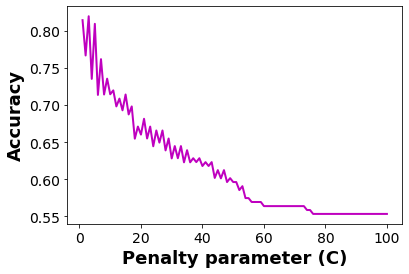

In [48]:
fig = plt.figure(1)
ax = plt.axes()


plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

ax.set_xlabel('Penalty parameter (C)', fontsize=18, fontdict=dict(weight='bold'))
ax.set_ylabel('Accuracy', fontsize=18, fontdict=dict(weight='bold'))

graph = ax.plot(k_range,df_mean, "m-", linewidth=2)